In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# Normalize pixel values to the range [0, 1]
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


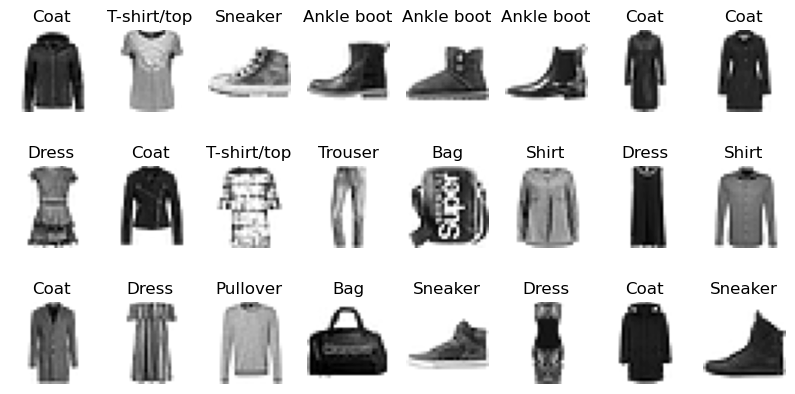

In [4]:
# Plot some sample images with labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 5))
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [5]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# Define the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [9]:
# Train the model with a validation split
history = model.fit(X_train, y_train,  validation_split=0.2, 
                    epochs=30, 
                    batch_size=128)

Epoch 1/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9079 - loss: 0.2614 - val_accuracy: 0.8821 - val_loss: 0.3301
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9090 - loss: 0.2606 - val_accuracy: 0.8828 - val_loss: 0.3289
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9093 - loss: 0.2562 - val_accuracy: 0.8835 - val_loss: 0.3254
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9096 - loss: 0.2561 - val_accuracy: 0.8818 - val_loss: 0.3345
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9110 - loss: 0.2521 - val_accuracy: 0.8835 - val_loss: 0.3274
Epoch 6/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9131 - loss: 0.2469 - val_accuracy: 0.8826 - val_loss: 0.3285
Epoch 7/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9137 - loss: 0.2467 - val_accuracy: 0.8836 - val_loss: 0.3251
Epoch 8/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9099 - loss: 0.2562 - val_accur

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

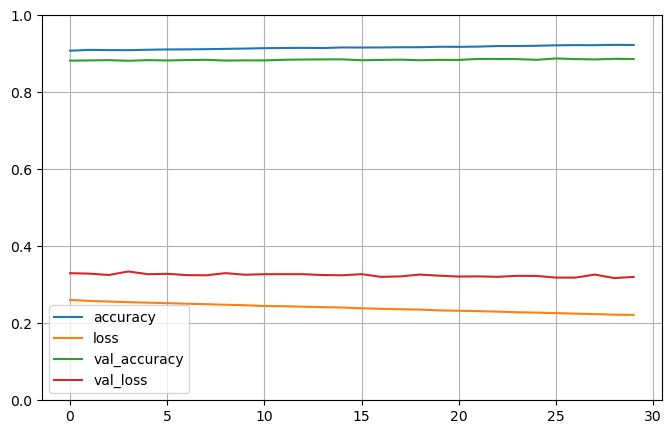

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

313/313 - 1s - 4ms/step - accuracy: 0.8524 - loss: 63.0331
Test Loss: 63.0331, Test Accuracy: 0.8524


## Save and Load the Model

In [17]:
# Save the trained model
model.save("fashion_classifier.h5")

In [18]:
# Load the model (when needed)
from tensorflow.keras.models import load_model
model = load_model("fashion_classifier.h5")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


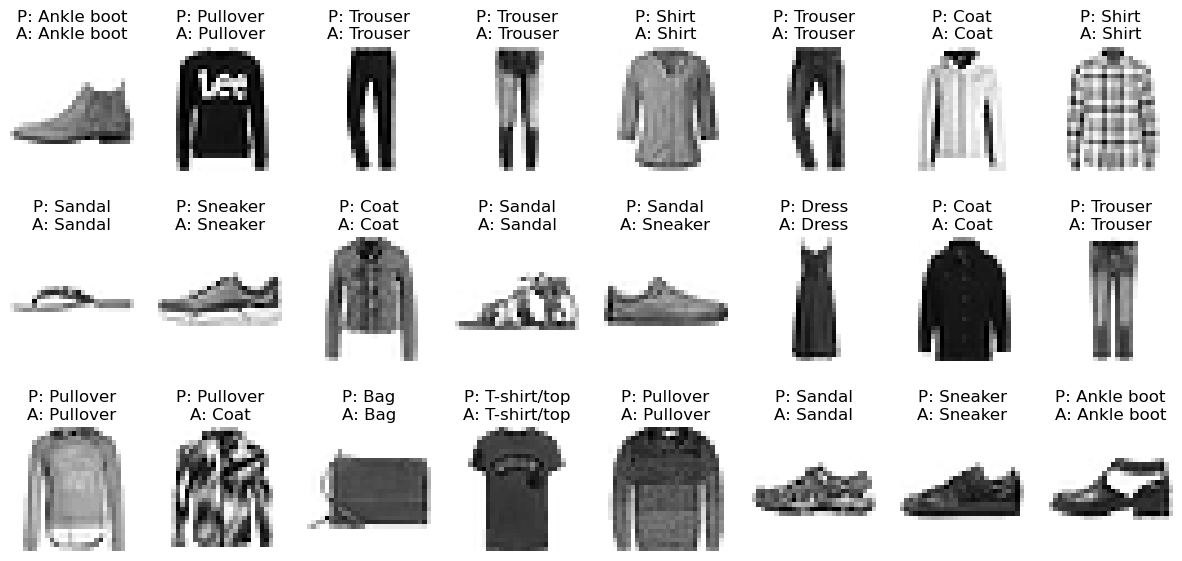

In [19]:
# Predict the class for some test images
predictions = model.predict(X_test)

# Plot the first 5 test predictions with actual labels
plt.figure(figsize=(15, 7))
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(X_test[i], cmap='gray_r')
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(y_test[i])
    plt.title(f'P: {class_names[predicted_label]}\nA: {class_names[actual_label]}')
    plt.axis('off')
plt.show()